In [4]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('/content/updated_air_quality_data.csv')

In [6]:
data.head()

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
0,179772,Emissions,Density,UHF42,Queens,Other,2015-01-01,0.3,Good
1,179785,Emissions,Density,UHF42,Unknown,Other,2015-01-01,1.2,Good
2,178540,General Pollution,Miles,UHF42,Unknown,Annual Average,2011-12-01,8.6,Good
3,178561,General Pollution,Miles,UHF42,Queens,Annual Average,2011-12-01,8.0,Good
4,823217,General Pollution,Miles,UHF42,Queens,Summer,2022-06-01,6.1,Good


**HANDLE MISSING VALUES**


In [7]:
missing_values=data.isnull().sum()
missing_values

,0
Unique ID,0
Name,0
Measure,0
Geo Type Name,0
Geo Place Name,0
Time Period,0
Start_Date,0
Data Value,0
Air Quality Category,0


**HANDLE DUPLICATE VALUES**

In [8]:
duplicate_values=data.duplicated().sum()
duplicate_values

0

**Descriptive Statistical Analysis**

In [9]:
data.describe()

,Unique ID,Data Value
count,18016.000000,18016.000000
mean,426187.112789,21.412678
std,250391.154793,23.976151
min,121644.000000,0.000000
25%,175300.750000,8.900000
50%,410798.500000,15.200000
75%,649886.250000,26.700000
max,828353.000000,424.700000


In [10]:
data.shape

(18016, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             18016 non-null  int64  
 1   Name                  18016 non-null  object 
 2   Measure               18016 non-null  object 
 3   Geo Type Name         18016 non-null  object 
 4   Geo Place Name        18016 non-null  object 
 5   Time Period           18016 non-null  object 
 6   Start_Date            18016 non-null  object 
 7   Data Value            18016 non-null  float64
 8   Air Quality Category  18016 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


**EDA**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Name', 'Measure', 'Geo Type Name', 'Geo Place Name', 'Time Period', 'Start_Date', 'Air Quality Category']


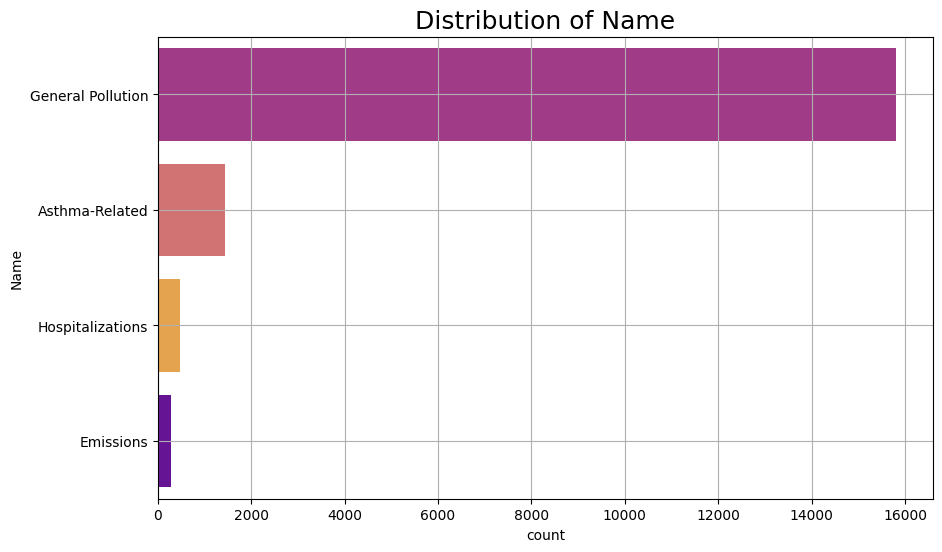

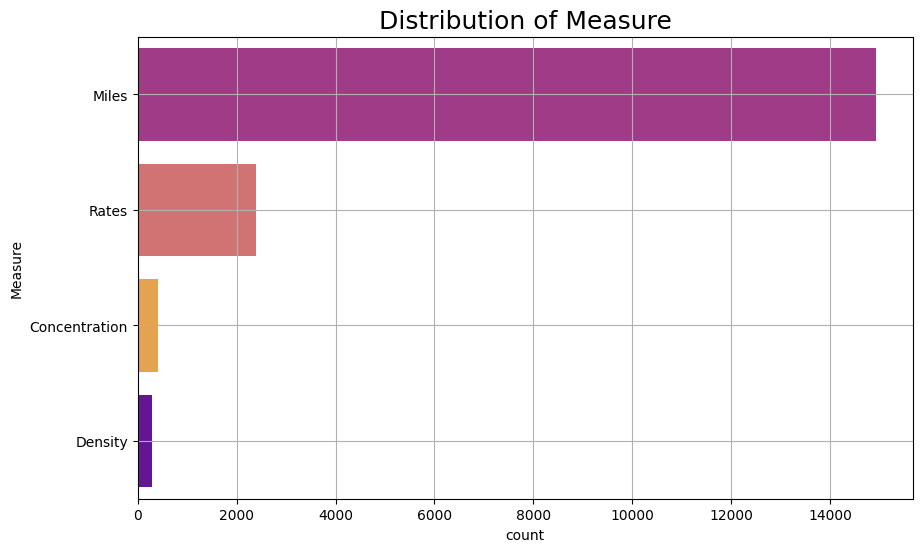

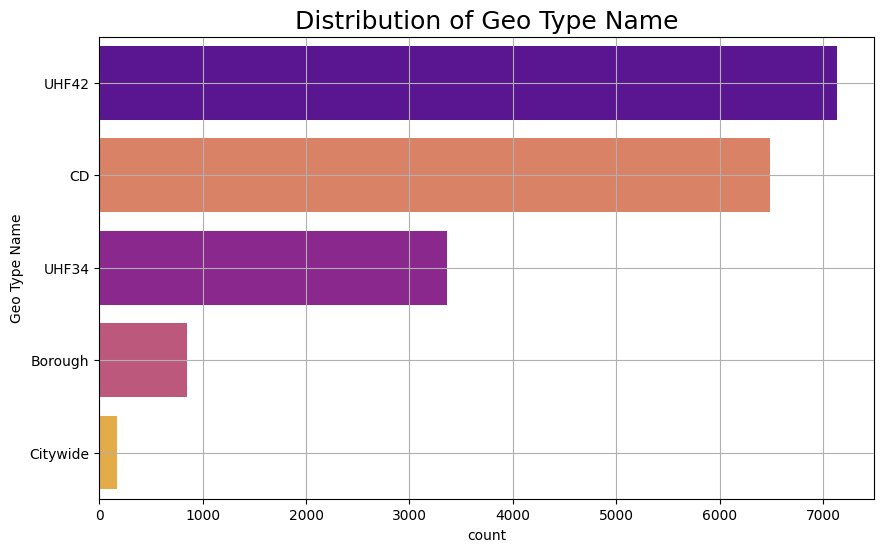

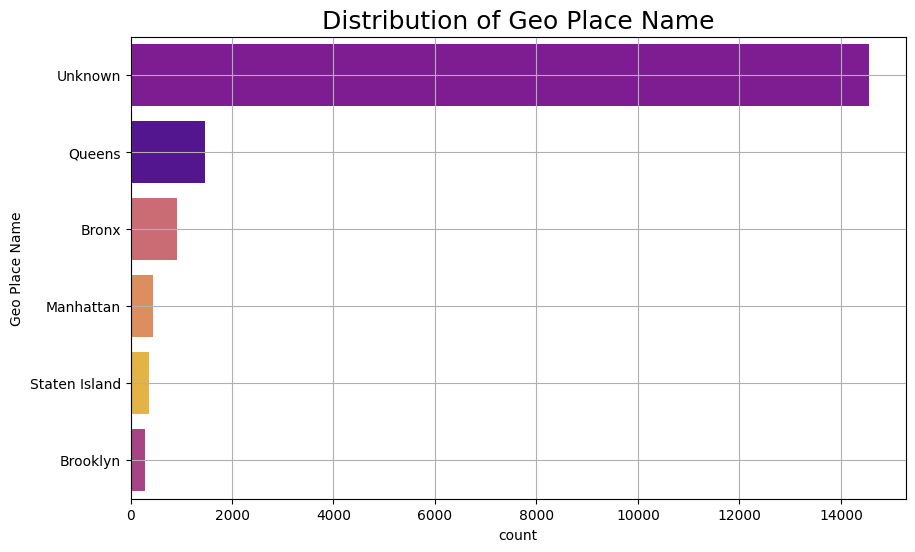

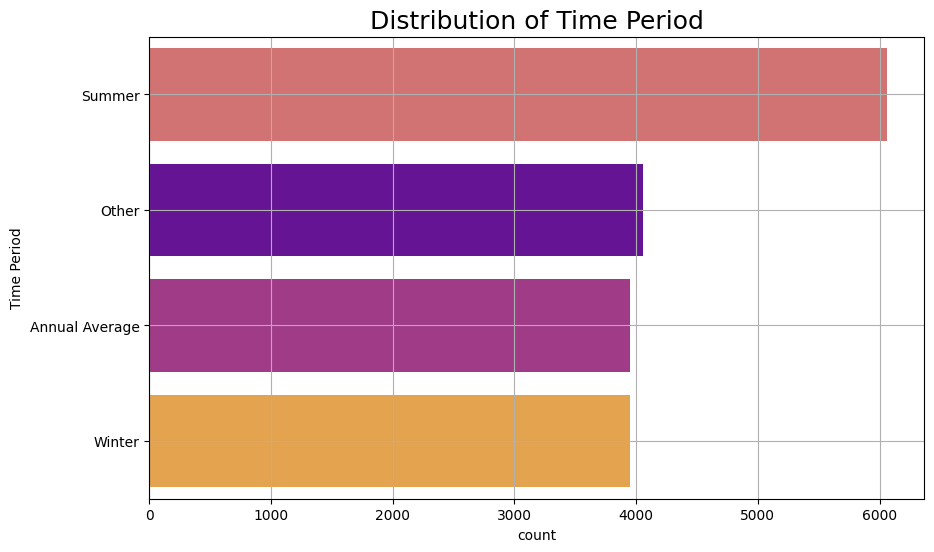

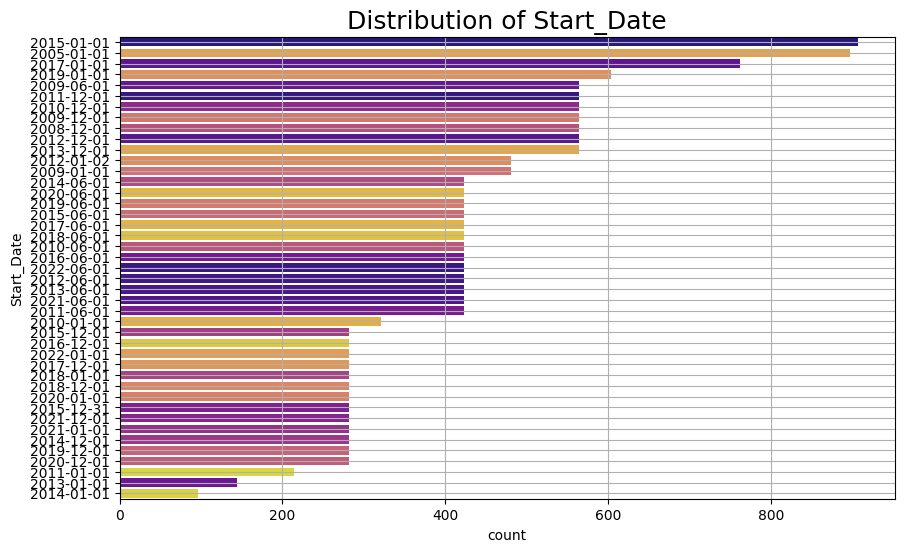

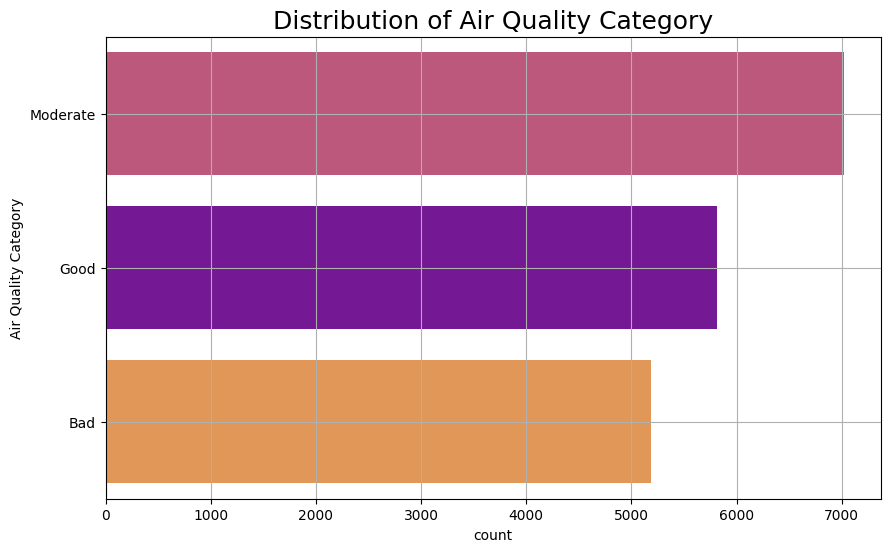

In [14]:
for col in categorical_cols:
  #print(f"value Counts for {col}")
  #print(data[col].value_counts())
  plt.figure(figsize=(10, 6))
  sns.countplot(y=data[col] , order=data[col].value_counts().index,hue=data[col], palette="plasma", legend=False)
  plt.title(f"Distribution of {col}", fontsize=18)
  plt.grid()
  plt.show()

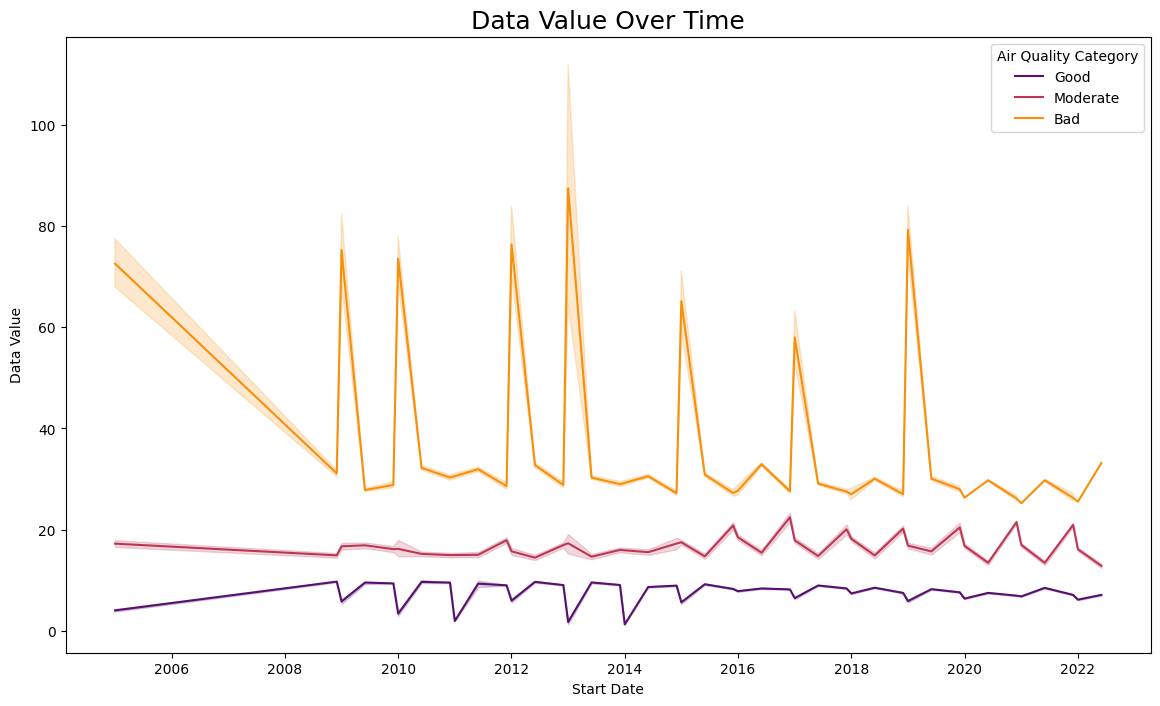

In [15]:
data["Start_Date"] = pd.to_datetime(data["Start_Date"])
plt.figure(figsize=(14, 8))
sns.lineplot(data=data , x="Start_Date", y="Data Value", hue="Air Quality Category", palette="inferno")
plt.title("Data Value Over Time", fontsize=18)
plt.xlabel("Start Date")
plt.ylabel("Data Value")
plt.legend(title="Air Quality Category")
plt.show()

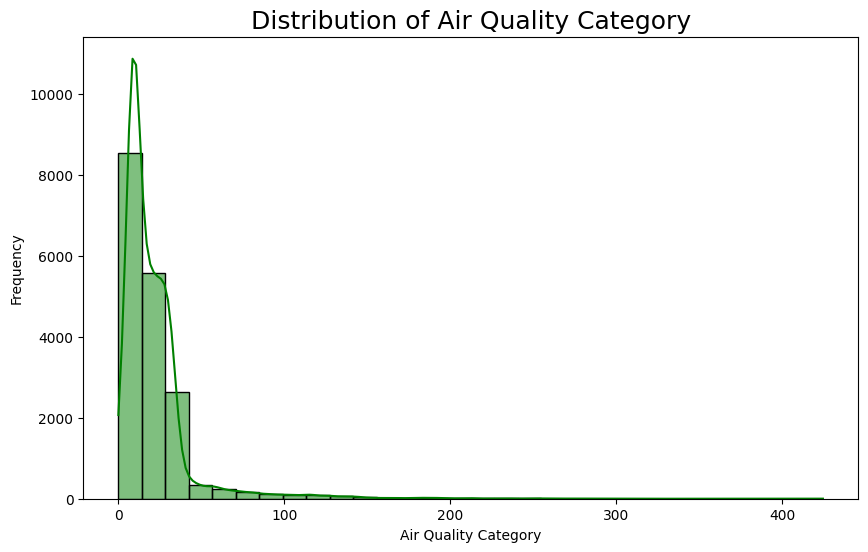

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Data Value'], kde=True, bins=30, color="green")
plt.title(f"Distribution of {col}", fontsize=18)
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


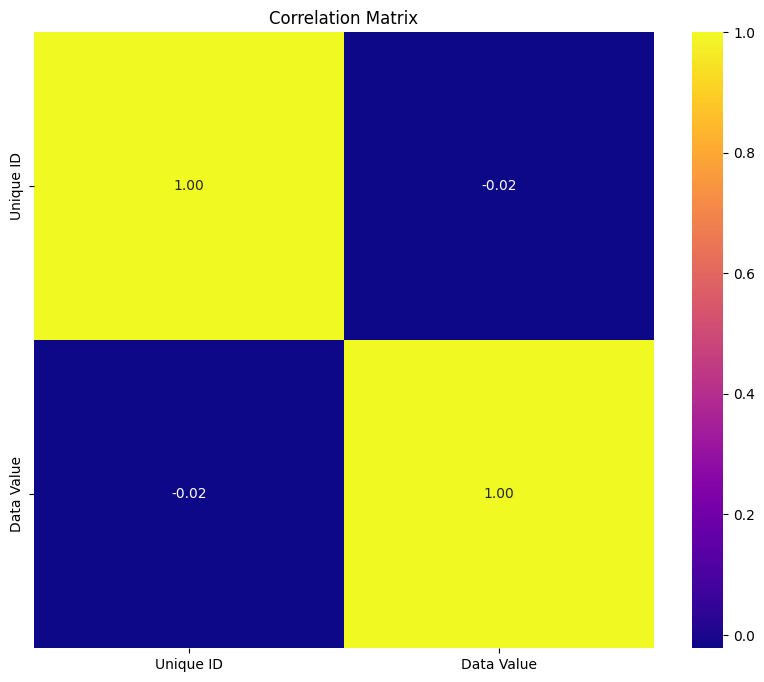

In [17]:
correlation_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = data.drop(['Air Quality Category','Start_Date'], axis=1)
y = data['Air Quality Category']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()

In [25]:

from sklearn.preprocessing import OneHotEncoder

 #Create OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output


#Fit and transform categorical features in X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) # Added random_state for reproducibility

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()  # Identify categorical columns

# Fit OneHotEncoder on training data
encoder.fit(X_train.loc[:,categorical_features])

# Transform categorical features in training and testing data
X_train_encoded = encoder.transform(X_train.loc[:,categorical_features])
X_test_encoded = encoder.transform(X_test.loc[:,categorical_features])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames with encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical features and concat encoded features
X_train = X_train.drop(categorical_features, axis=1).join(X_train_encoded_df)
X_test = X_test.drop(categorical_features, axis=1).join(X_test_encoded_df)


# Fit the model with encoded data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.predict(X_test)

array(['Bad', 'Good', 'Bad', ..., 'Good', 'Good', 'Moderate'],
      dtype=object)

In [27]:
y_test

,Air Quality Category
2240,Bad
1841,Good
16622,Bad
13677,Moderate
8640,Bad
...,...
4778,Moderate
16610,Moderate
7836,Good
17202,Good


In [28]:
model.score(X_test,y_test)

0.8310210876803552

In [36]:
model.predict_proba(X_test)

array([[9.70681848e-01, 2.88872416e-05, 2.92892646e-02],
       [3.58860752e-04, 6.46389954e-01, 3.53251185e-01],
       [7.33031126e-01, 2.37133737e-03, 2.64597536e-01],
       ...,
       [1.03454381e-03, 5.86990246e-01, 4.11975210e-01],
       [8.00583918e-04, 7.03857059e-01, 2.95342357e-01],
       [6.86826131e-02, 9.36597970e-02, 8.37657590e-01]])

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test) # Get predictions first

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8310210876803552
Precision: 0.8336776641534097
Recall: 0.8310210876803552
F1-score: 0.8298593629034722
